<a href="https://colab.research.google.com/github/nidhiann24/Devfolio_Tamasha/blob/main/cyberbullying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv('cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [23]:
import chardet
with open('cyberbullying_tweets.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1254',
 'confidence': 0.47836241516326306,
 'language': 'Turkish'}

In [24]:
df= pd.read_csv('cyberbullying_tweets.csv',encoding='latin-1')
print(df.shape)
df.head()

(47692, 2)


,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [25]:
c=df.isnull().sum()
c

tweet_text            0
cyberbullying_type    0
dtype: int64

In [26]:
df.shape

(47692, 2)

In [27]:
df.describe()

,tweet_text,cyberbullying_type
count,47692,47692
unique,46017,6
top,RT @sailorhg: the intro for my hardware hackin...,religion
freq,2,7998


In [28]:
df['length'] = df['tweet_text'].apply(len)
df.head()

,tweet_text,cyberbullying_type,length
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103


In [29]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

<Axes: ylabel='Frequency'>

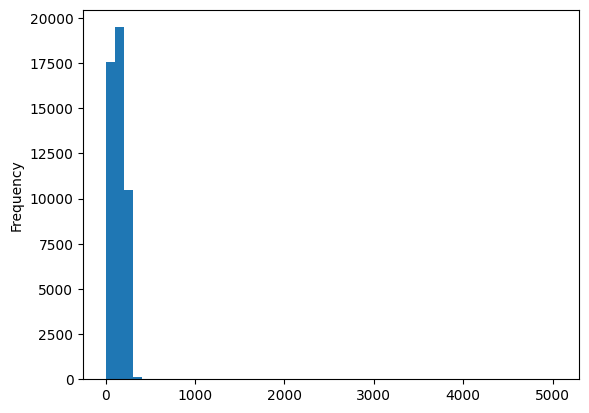

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
df['length'].plot(bins=50, kind='hist')

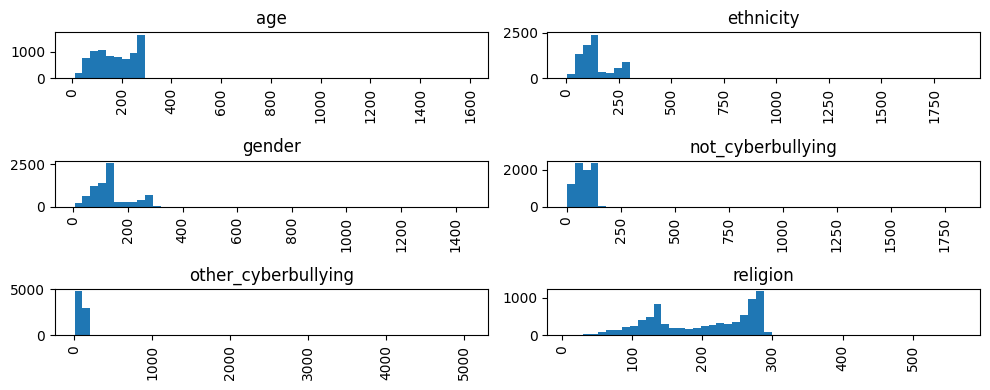

In [32]:
df.hist(column='length', by='cyberbullying_type', bins=50,figsize=(10,4))
plt.tight_layout()

In [33]:
df.loc[:,'cyberbullying_type'] = df.cyberbullying_type.map({'not_cyberbullying':0, 'gender':1, 'religion':2, 'other_cyberbullying':3,'age':4, 'ethnicity':5})
print(df.shape)
df.head()


(47692, 3)


<ipython-input-33-9cbd090a9159>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'cyberbullying_type'] = df.cyberbullying_type.map({'not_cyberbullying':0, 'gender':1, 'religion':2, 'other_cyberbullying':3,'age':4, 'ethnicity':5})


,tweet_text,cyberbullying_type,length
0,"In other words #katandandre, your food was cra...",0,61
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,115
2,@XochitlSuckkks a classy whore? Or more red ve...,0,60
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,103
4,@RudhoeEnglish This is an ISIS account pretend...,0,103


In [34]:
df.tail()

,tweet_text,cyberbullying_type,length
47687,"Black ppl aren't expected to do anything, depe...",5,234
47688,Turner did not withhold his disappointment. Tu...,5,284
47689,I swear to God. This dumb nigger bitch. I have...,5,104
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,5,90
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,5,76


In [37]:
documents = ['gay','slur','Die','Suicide','fucking whore','slut','ugly',
'worthless',
'Nobody likes you',
'Kill yourself',
'Go die',
'I hope you get cancer',
'loser',
'failure',
'You will never amount to anything',
'No one cares about you',
'burden',
'I wish you were dead',
'stupid',
'fat',
'You are a joke',
'waste of space',
'I hate you',
'You dont deserve to live',
'pathetic',
'Everyone hates you',
'freak',
'you are disgusting',
'crybaby',
'weak',
'nerd',
'geek',
'loner',
'You have no friends',
'weirdo',
'moron',
'dumbass',
'bastard',
'pussy',
'dick',
'idiot',
'piece of shit',
'waste of oxygen',
'You should kill yourself',
'I hope you suffer',
'Nobody will miss you',
'You are a mistake',
'You are a disappointment',
'You are a failure',
'Youre a reject',
'You are an outcast',
'unlovable',
'unwanted',
'fraud',
'liar',
'cheat',
'backstabber',
'You are a tease',
'prude',
'skank',
'tramp',
'fat',
'gross',
'slob','hoe',
'You are a mess',
'You are a failure',
'You are a nobody',
'You are a moron',
'You are stupid',
'You are dumb',
'You are mean',
'You are cruel',
'You are a psychopath',
'You are a monster',
'You are a demon',
'You are a devil',
'You are a troll','bitch','son of a bitch','I hope you die','motherfucker','Islamic terrorism']

In [38]:
lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)

['gay', 'slur', 'die', 'suicide', 'fucking whore', 'slut', 'ugly', 'worthless', 'nobody likes you', 'kill yourself', 'go die', 'i hope you get cancer', 'loser', 'failure', 'you will never amount to anything', 'no one cares about you', 'burden', 'i wish you were dead', 'stupid', 'fat', 'you are a joke', 'waste of space', 'i hate you', 'you dont deserve to live', 'pathetic', 'everyone hates you', 'freak', 'you are disgusting', 'crybaby', 'weak', 'nerd', 'geek', 'loner', 'you have no friends', 'weirdo', 'moron', 'dumbass', 'bastard', 'pussy', 'dick', 'idiot', 'piece of shit', 'waste of oxygen', 'you should kill yourself', 'i hope you suffer', 'nobody will miss you', 'you are a mistake', 'you are a disappointment', 'you are a failure', 'youre a reject', 'you are an outcast', 'unlovable', 'unwanted', 'fraud', 'liar', 'cheat', 'backstabber', 'you are a tease', 'prude', 'skank', 'tramp', 'fat', 'gross', 'slob', 'hoe', 'you are a mess', 'you are a failure', 'you are a nobody', 'you are a moron

In [39]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))

sans_punctuation_documents

['gay',
 'slur',
 'die',
 'suicide',
 'fucking whore',
 'slut',
 'ugly',
 'worthless',
 'nobody likes you',
 'kill yourself',
 'go die',
 'i hope you get cancer',
 'loser',
 'failure',
 'you will never amount to anything',
 'no one cares about you',
 'burden',
 'i wish you were dead',
 'stupid',
 'fat',
 'you are a joke',
 'waste of space',
 'i hate you',
 'you dont deserve to live',
 'pathetic',
 'everyone hates you',
 'freak',
 'you are disgusting',
 'crybaby',
 'weak',
 'nerd',
 'geek',
 'loner',
 'you have no friends',
 'weirdo',
 'moron',
 'dumbass',
 'bastard',
 'pussy',
 'dick',
 'idiot',
 'piece of shit',
 'waste of oxygen',
 'you should kill yourself',
 'i hope you suffer',
 'nobody will miss you',
 'you are a mistake',
 'you are a disappointment',
 'you are a failure',
 'youre a reject',
 'you are an outcast',
 'unlovable',
 'unwanted',
 'fraud',
 'liar',
 'cheat',
 'backstabber',
 'you are a tease',
 'prude',
 'skank',
 'tramp',
 'fat',
 'gross',
 'slob',
 'hoe',
 'you are a

In [40]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['gay'],
 ['slur'],
 ['die'],
 ['suicide'],
 ['fucking', 'whore'],
 ['slut'],
 ['ugly'],
 ['worthless'],
 ['nobody', 'likes', 'you'],
 ['kill', 'yourself'],
 ['go', 'die'],
 ['i', 'hope', 'you', 'get', 'cancer'],
 ['loser'],
 ['failure'],
 ['you', 'will', 'never', 'amount', 'to', 'anything'],
 ['no', 'one', 'cares', 'about', 'you'],
 ['burden'],
 ['i', 'wish', 'you', 'were', 'dead'],
 ['stupid'],
 ['fat'],
 ['you', 'are', 'a', 'joke'],
 ['waste', 'of', 'space'],
 ['i', 'hate', 'you'],
 ['you', 'dont', 'deserve', 'to', 'live'],
 ['pathetic'],
 ['everyone', 'hates', 'you'],
 ['freak'],
 ['you', 'are', 'disgusting'],
 ['crybaby'],
 ['weak'],
 ['nerd'],
 ['geek'],
 ['loner'],
 ['you', 'have', 'no', 'friends'],
 ['weirdo'],
 ['moron'],
 ['dumbass'],
 ['bastard'],
 ['pussy'],
 ['dick'],
 ['idiot'],
 ['piece', 'of', 'shit'],
 ['waste', 'of', 'oxygen'],
 ['you', 'should', 'kill', 'yourself'],
 ['i', 'hope', 'you', 'suffer'],
 ['nobody', 'will', 'miss', 'you'],
 ['you', 'are', 'a', 'mistake'],

In [41]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'gay': 1}),
 Counter({'slur': 1}),
 Counter({'die': 1}),
 Counter({'suicide': 1}),
 Counter({'fucking': 1, 'whore': 1}),
 Counter({'slut': 1}),
 Counter({'ugly': 1}),
 Counter({'worthless': 1}),
 Counter({'nobody': 1, 'likes': 1, 'you': 1}),
 Counter({'kill': 1, 'yourself': 1}),
 Counter({'go': 1, 'die': 1}),
 Counter({'i': 1, 'hope': 1, 'you': 1, 'get': 1, 'cancer': 1}),
 Counter({'loser': 1}),
 Counter({'failure': 1}),
 Counter({'you': 1,
          'will': 1,
          'never': 1,
          'amount': 1,
          'to': 1,
          'anything': 1}),
 Counter({'no': 1, 'one': 1, 'cares': 1, 'about': 1, 'you': 1}),
 Counter({'burden': 1}),
 Counter({'i': 1, 'wish': 1, 'you': 1, 'were': 1, 'dead': 1}),
 Counter({'stupid': 1}),
 Counter({'fat': 1}),
 Counter({'you': 1, 'are': 1, 'a': 1, 'joke': 1}),
 Counter({'waste': 1, 'of': 1, 'space': 1}),
 Counter({'i': 1, 'hate': 1, 'you': 1}),
 Counter({'you': 1, 'dont': 1, 'deserve': 1, 'to': 1, 'live': 1}),
 Counter({'pathetic': 1}),
 C

In [59]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))

sans_punctuation_documents

['gay',
 'slur',
 'die',
 'suicide',
 'fucking whore',
 'slut',
 'ugly',
 'worthless',
 'nobody likes you',
 'kill yourself',
 'go die',
 'i hope you get cancer',
 'loser',
 'failure',
 'you will never amount to anything',
 'no one cares about you',
 'burden',
 'i wish you were dead',
 'stupid',
 'fat',
 'you are a joke',
 'waste of space',
 'i hate you',
 'you dont deserve to live',
 'pathetic',
 'everyone hates you',
 'freak',
 'you are disgusting',
 'crybaby',
 'weak',
 'nerd',
 'geek',
 'loner',
 'you have no friends',
 'weirdo',
 'moron',
 'dumbass',
 'bastard',
 'pussy',
 'dick',
 'idiot',
 'piece of shit',
 'waste of oxygen',
 'you should kill yourself',
 'i hope you suffer',
 'nobody will miss you',
 'you are a mistake',
 'you are a disappointment',
 'you are a failure',
 'youre a reject',
 'you are an outcast',
 'unlovable',
 'unwanted',
 'fraud',
 'liar',
 'cheat',
 'backstabber',
 'you are a tease',
 'prude',
 'skank',
 'tramp',
 'fat',
 'gross',
 'slob',
 'hoe',
 'you are a

In [60]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['gay'],
 ['slur'],
 ['die'],
 ['suicide'],
 ['fucking', 'whore'],
 ['slut'],
 ['ugly'],
 ['worthless'],
 ['nobody', 'likes', 'you'],
 ['kill', 'yourself'],
 ['go', 'die'],
 ['i', 'hope', 'you', 'get', 'cancer'],
 ['loser'],
 ['failure'],
 ['you', 'will', 'never', 'amount', 'to', 'anything'],
 ['no', 'one', 'cares', 'about', 'you'],
 ['burden'],
 ['i', 'wish', 'you', 'were', 'dead'],
 ['stupid'],
 ['fat'],
 ['you', 'are', 'a', 'joke'],
 ['waste', 'of', 'space'],
 ['i', 'hate', 'you'],
 ['you', 'dont', 'deserve', 'to', 'live'],
 ['pathetic'],
 ['everyone', 'hates', 'you'],
 ['freak'],
 ['you', 'are', 'disgusting'],
 ['crybaby'],
 ['weak'],
 ['nerd'],
 ['geek'],
 ['loner'],
 ['you', 'have', 'no', 'friends'],
 ['weirdo'],
 ['moron'],
 ['dumbass'],
 ['bastard'],
 ['pussy'],
 ['dick'],
 ['idiot'],
 ['piece', 'of', 'shit'],
 ['waste', 'of', 'oxygen'],
 ['you', 'should', 'kill', 'yourself'],
 ['i', 'hope', 'you', 'suffer'],
 ['nobody', 'will', 'miss', 'you'],
 ['you', 'are', 'a', 'mistake'],

In [61]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'gay': 1}),
 Counter({'slur': 1}),
 Counter({'die': 1}),
 Counter({'suicide': 1}),
 Counter({'fucking': 1, 'whore': 1}),
 Counter({'slut': 1}),
 Counter({'ugly': 1}),
 Counter({'worthless': 1}),
 Counter({'nobody': 1, 'likes': 1, 'you': 1}),
 Counter({'kill': 1, 'yourself': 1}),
 Counter({'go': 1, 'die': 1}),
 Counter({'i': 1, 'hope': 1, 'you': 1, 'get': 1, 'cancer': 1}),
 Counter({'loser': 1}),
 Counter({'failure': 1}),
 Counter({'you': 1,
          'will': 1,
          'never': 1,
          'amount': 1,
          'to': 1,
          'anything': 1}),
 Counter({'no': 1, 'one': 1, 'cares': 1, 'about': 1, 'you': 1}),
 Counter({'burden': 1}),
 Counter({'i': 1, 'wish': 1, 'you': 1, 'were': 1, 'dead': 1}),
 Counter({'stupid': 1}),
 Counter({'fat': 1}),
 Counter({'you': 1, 'are': 1, 'a': 1, 'joke': 1}),
 Counter({'waste': 1, 'of': 1, 'space': 1}),
 Counter({'i': 1, 'hate': 1, 'you': 1}),
 Counter({'you': 1, 'dont': 1, 'deserve': 1, 'to': 1, 'live': 1}),
 Counter({'pathetic': 1}),
 C

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [68]:
pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import nltk

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()
X = count_vector.fit_transform(documents)

feature_names = count_vector.get_feature_names_out()



In [73]:
count_vector.fit(documents)
count_vector.get_feature_names_out()

array(['about', 'amount', 'an', 'anything', 'are', 'backstabber',
       'bastard', 'bitch', 'burden', 'cancer', 'cares', 'cheat', 'cruel',
       'crybaby', 'dead', 'demon', 'deserve', 'devil', 'dick', 'die',
       'disappointment', 'disgusting', 'dont', 'dumb', 'dumbass',
       'everyone', 'failure', 'fat', 'fraud', 'freak', 'friends',
       'fucking', 'gay', 'geek', 'get', 'go', 'gross', 'hate', 'hates',
       'have', 'hoe', 'hope', 'idiot', 'islamic', 'joke', 'kill', 'liar',
       'likes', 'live', 'loner', 'loser', 'mean', 'mess', 'miss',
       'mistake', 'monster', 'moron', 'motherfucker', 'nerd', 'never',
       'no', 'nobody', 'of', 'one', 'outcast', 'oxygen', 'pathetic',
       'piece', 'prude', 'psychopath', 'pussy', 'reject', 'shit',
       'should', 'skank', 'slob', 'slur', 'slut', 'son', 'space',
       'stupid', 'suffer', 'suicide', 'tease', 'terrorism', 'to', 'tramp',
       'troll', 'ugly', 'unlovable', 'unwanted', 'waste', 'weak',
       'weirdo', 'were', 'whore',

In [64]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [75]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names_out())
frequency_matrix

,about,amount,an,anything,are,backstabber,bastard,bitch,burden,cancer,...,weak,weirdo,were,whore,will,wish,worthless,you,youre,yourself
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
79,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['tweet_text'],
                                                    df['cyberbullying_type'],test_size=0.20,
                                                    random_state=1)

In [78]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix.
testing_data = count_vector.transform(X_test)

In [79]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB()

In [80]:
predictions = naive_bayes.predict(testing_data)

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))


Accuracy score: 0.7695775238494601


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['tweet_text'], df['cyberbullying_type'], random_state=42)

In [85]:
#Split into words and vectorizing the data
countVector = CountVectorizer()
dataTrain  = countVector.fit_transform(X_train.values)
dataTest = countVector.transform(X_test.values)
dataTrain

<35769x51588 sparse matrix of type '<class 'numpy.int64'>'
	with 735968 stored elements in Compressed Sparse Row format>

In [92]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(predicted, y_test, target_names = ['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying','age', 'ethnicity'], digits = 6))
print("Accuracy = ",accuracy_score(predicted, y_test))

                     precision    recall  f1-score   support

  not_cyberbullying   0.359360  0.700378  0.475000      1058
             gender   0.850156  0.815369  0.832399      2004
           religion   0.973711  0.763232  0.855719      2475
other_cyberbullying   0.501992  0.656250  0.568849      1536
                age   0.988894  0.707731  0.825016      2768
          ethnicity   0.897512  0.866475  0.881720      2082

           accuracy                       0.757779     11923
          macro avg   0.761938  0.751573  0.739784     11923
       weighted avg   0.827878  0.757779  0.778472     11923

Accuracy =  0.7577790824456933
